In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date

In [61]:
data_player_gen = data_player(data_pool)
print(next(data_player_gen))

ticker       1332 JT            1333 JT          1334 JT             \
                last     volume    last volume      last     volume   
date                                                                  
2013-01-08  166.3266  1759800.0     NaN    NaN  144.9890   869000.0   
2013-01-09  165.4026   767800.0     NaN    NaN  144.9890   654000.0   
2013-01-10  167.2507  1503100.0     NaN    NaN  144.9890   661000.0   
2013-01-11  170.9468  2864200.0     NaN    NaN  147.8887  2351000.0   
2013-01-15  174.6430  2407400.0     NaN    NaN  152.7217  1919000.0   
2013-01-16  169.0987  3636700.0     NaN    NaN  154.6549  2856000.0   
2013-01-17  169.0987  3433500.0     NaN    NaN  152.7217  1726000.0   
2013-01-18  174.6430  1847500.0     NaN    NaN  155.6215  1135000.0   
2013-01-21  173.7189  1863300.0     NaN    NaN  153.6883   942000.0   
2013-01-22  170.9468  2203200.0     NaN    NaN  152.7217  2060000.0   
2013-01-23  164.4785  1396000.0     NaN    NaN  144.9890  2831000.0   
2013-0

In [5]:
def strategy(data ):
    target_position = [1]* len(SYMBOLS)
    return target_position

In [16]:
class backtest_engine():
    def __init__(self, data_pool, strategy):
        
        self.data_player_gen = self.data_player(data_pool)
        self.pnl = pd.DataFrame({'date':[], 'pnl':[]})
        self.cur_pos = None
        self.pos_his = pd.DataFrame(columns=['date'] + SYMBOLS)
        # self.pos_his.columns = 

        self.strategy = strategy

    def data_player(self, data_pool: pd.DataFrame):
        data_pool = data_pool[data_pool.index.to_series().between(DATE_START, DATE_END)]
        data_pool = data_pool.sort_index(axis=1, level=0)
        calendar = data_pool.index
        duration = WINDOW+1
        # print(data_pool)
        for i in range(duration-1, len(calendar)):
            data_out = data_pool.iloc[i-duration+1:i,:].loc[:, (SYMBOLS, slice(None))]
            yield data_out
    

    def portfolio_manager(self, target_position, dt, price):
        assert len(target_position)==len(SYMBOLS)
        print(price)
        prc = price[SYMBOLS].values
        open_pos = target_position*prc
        self.pnl = self.pnl.append({'date':dt, 'value':open_pos}, ignore_index=True)
        self.pos_his = self.pos_his.append(dict(zip(['date']+SYMBOLS, [dt]+target_position)), ignore_index=True)


    def end_backtest(self):
        self.pnl.to_csv('pnl.csv', index=False)
        self.pos_his.to_csv('position.csv', index=False)

    def trading_engine(self):
        for backtest_data in self.data_player_gen:
            # backtest_data = next(self.data_player_gen)
            tod_price = backtest_data.iloc[-1].loc[(SYMBOLS, 'last')]
            today_dt = backtest_data.iloc[-1].index
            his_data = backtest_data.iloc[:-1]
            print(backtest_data)
            target_position = self.strategy(his_data)
            self.portfolio_manager(target_position, today_dt, tod_price)

In [17]:
data_pool = pd.read_csv("data.csv", index_col='date', parse_dates=True).pivot(columns='ticker')
data_pool = data_pool.swaplevel(1,0, axis=1)

# backtest config
WINDOW = 14
SYMBOLS = data_pool.columns.get_level_values(0).unique()
DATE_START = datetime(2013,1,8)
DATE_END = datetime(2020,1,8)

INIT_CAPITAL = 1000000

assert WINDOW >0

bktst = backtest_engine(data_pool, strategy)



In [18]:

bktst.trading_engine()

ticker       1332 JT            1333 JT          1334 JT             \
                last     volume    last volume      last     volume   
date                                                                  
2013-01-08  166.3266  1759800.0     NaN    NaN  144.9890   869000.0   
2013-01-09  165.4026   767800.0     NaN    NaN  144.9890   654000.0   
2013-01-10  167.2507  1503100.0     NaN    NaN  144.9890   661000.0   
2013-01-11  170.9468  2864200.0     NaN    NaN  147.8887  2351000.0   
2013-01-15  174.6430  2407400.0     NaN    NaN  152.7217  1919000.0   
2013-01-16  169.0987  3636700.0     NaN    NaN  154.6549  2856000.0   
2013-01-17  169.0987  3433500.0     NaN    NaN  152.7217  1726000.0   
2013-01-18  174.6430  1847500.0     NaN    NaN  155.6215  1135000.0   
2013-01-21  173.7189  1863300.0     NaN    NaN  153.6883   942000.0   
2013-01-22  170.9468  2203200.0     NaN    NaN  152.7217  2060000.0   
2013-01-23  164.4785  1396000.0     NaN    NaN  144.9890  2831000.0   
2013-0

KeyboardInterrupt: 

In [21]:
data_pool.apply(lambda x: 1 if np.isnan(x) else 0).plot()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<AxesSubplot:xlabel='date'>

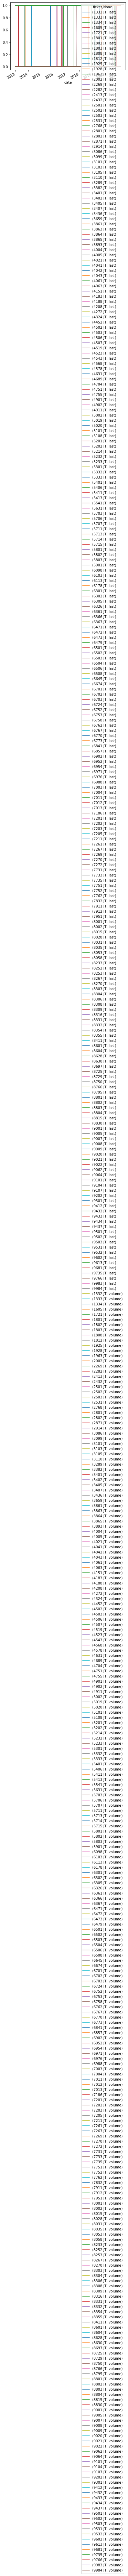

In [28]:
data_pool.where(np.isnan, other=0).fillna(1).plot()

In [24]:
data_pool

ticker,1332 JT,1333 JT,1334 JT,1605 JT,1721 JT,1801 JT,1802 JT,1803 JT,1808 JT,1812 JT,...,9503 JT,9531 JT,9532 JT,9602 JT,9613 JT,9681 JT,9735 JT,9766 JT,9983 JT,9984 JT
,last,last,last,last,last,last,last,last,last,last,...,volume,volume,volume,volume,volume,volume,volume,volume,volume,volume
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,169.0987,NaN,147.8887,970.6780,950.5521,1232.0186,413.2189,278.1162,NaN,478.8201,...,11514100.0,2685000.0,1988200.0,482800.0,3148000.0,1114500.0,800500.0,1513200.0,587300.0,12023000.0
2013-01-07,166.3266,NaN,144.9890,960.1615,924.2187,1236.1949,411.5426,278.1162,NaN,480.4769,...,8334600.0,2401200.0,1495200.0,458000.0,4289000.0,2862000.0,688400.0,1841700.0,980700.0,13892400.0
2013-01-08,166.3266,NaN,144.9890,955.9548,938.6596,1215.3132,407.3517,277.2709,NaN,473.8496,...,6308100.0,2478000.0,1598800.0,635200.0,4065500.0,1620000.0,760300.0,2582000.0,616800.0,10749800.0
2013-01-09,165.4026,NaN,144.9890,944.3866,945.4553,1240.3712,417.4098,278.9616,NaN,482.1337,...,7645400.0,2897200.0,1827800.0,1122300.0,3283500.0,3021500.0,848200.0,2015400.0,633900.0,11551600.0
2013-01-10,167.2507,NaN,144.9890,942.2833,943.7564,1252.9002,435.0114,284.8789,NaN,490.4178,...,17785700.0,3939400.0,2882200.0,1014300.0,3900000.0,1099000.0,635100.0,3119100.0,588100.0,8860200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,560.0000,2718.0,NaN,826.0000,3330.0000,4240.0000,1014.0000,921.0000,1509.0,1585.0000,...,2683400.0,1372900.0,1284500.0,271400.0,5256200.0,NaN,514900.0,547800.0,619200.0,12041200.0
2021-03-16,559.0000,2713.0,NaN,828.0000,3320.0000,4255.0000,1027.0000,928.0000,1540.0,1594.0000,...,3889200.0,1606800.0,1531800.0,527100.0,3727400.0,NaN,575000.0,453100.0,495500.0,11346000.0
